# Groupwork BigSkyEarth
## Feature Selection Group
### Group to use all usefull features

Feature selection from SDSS transients dataset under the leadership of **Brian Mac Namee**.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

Import the dataset.

In [2]:
df = pd.read_csv("data/resultNoMissingProcFull_small_strat_0.01_galaxy_class_ext_columnsDropped.csv")

elliptical    4141
spiral        2289
other          131
Name: galaxy_class, dtype: int64


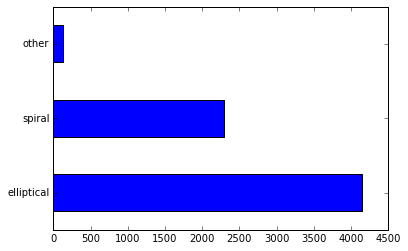

In [3]:
# class distribution
df["galaxy_class"].value_counts().plot(kind="barh")
print(df["galaxy_class"].value_counts())

In [4]:
df.head(2)

,objID,insideMask,flags,skyIvar_u,skyIvar_g,skyIvar_r,skyIvar_i,skyIvar_z,psfMag_u,psfMag_g,...,aE_i,modelMagDiff_u_g,modelMagDiff_g_r,modelMagDiff_r_i,modelMagDiff_i_z,petroMagDiff_g_r,petroMagDiff_r_i,petroMagDiff_i_z,galaxy_class_ext,ID_unit
0,1237645942904520960,0,281543964623616,1591.63745,7138.49561,3908.54077,2128.97314,58.638790,22.475695,20.426727,...,0.132589,2.275738,1.424240,0.554365,0.349043,1.344114,0.584330,0.391487,elliptical,1
1,1237645942905635072,0,35287719874904,1557.04480,6503.41016,2508.35767,1205.06287,45.111614,21.932791,19.775082,...,0.048125,2.073314,1.342137,0.576578,0.429380,1.310881,0.589006,0.417557,elliptical,5


### First Approach

Import the data, calculate difference features. Use a regular Random Forest on it.

In [5]:
feat = pd.DataFrame()
feat["objID"] = df["objID"]
feat["galaxy_class_ext"] = df["galaxy_class_ext"]
feat["psfMag_u"] = df["psfMag_u"]
feat["psfMag_g"] = df["psfMag_g"]
feat["psfMag_i"] = df["psfMag_i"]
feat["psfMag_r"] = df["psfMag_r"]
feat["psfMag_z"] = df["psfMag_z"]
feat["ug"] = df["psfMag_u"] - df["psfMag_g"]
feat["gr"] = df["psfMag_g"] - df["psfMag_r"]
feat["ri"] = df["psfMag_r"] - df["psfMag_i"]
feat["iz"] = df["psfMag_i"] - df["psfMag_z"]
feat["orig_ug"] = df["modelMagDiff_u_g"]
feat["orig_gr"] = df["modelMagDiff_g_r"]
feat["orig_ri"] = df["modelMagDiff_r_i"]
feat["orig_iz"] = df["modelMagDiff_i_z"]

In [6]:
feat.head(2)

,objID,galaxy_class_ext,psfMag_u,psfMag_g,psfMag_i,psfMag_r,psfMag_z,ug,gr,ri,iz,orig_ug,orig_gr,orig_ri,orig_iz
0,1237645942904520960,elliptical,22.475695,20.426727,18.562119,19.087791,18.071409,2.048968,1.338936,0.525672,0.490710,2.275738,1.424240,0.554365,0.349043
1,1237645942905635072,elliptical,21.932791,19.775082,18.001966,18.636234,17.494308,2.157709,1.138848,0.634268,0.507658,2.073314,1.342137,0.576578,0.429380


In [7]:
feat[feat["galaxy_class_ext"] == "elliptical"].head(2)

,objID,galaxy_class_ext,psfMag_u,psfMag_g,psfMag_i,psfMag_r,psfMag_z,ug,gr,ri,iz,orig_ug,orig_gr,orig_ri,orig_iz
0,1237645942904520960,elliptical,22.475695,20.426727,18.562119,19.087791,18.071409,2.048968,1.338936,0.525672,0.490710,2.275738,1.424240,0.554365,0.349043
1,1237645942905635072,elliptical,21.932791,19.775082,18.001966,18.636234,17.494308,2.157709,1.138848,0.634268,0.507658,2.073314,1.342137,0.576578,0.429380


In [8]:
from sklearn.cross_validation import train_test_split

In [9]:
train, test = train_test_split(feat, test_size=0.3, stratify=feat["galaxy_class_ext"])

In [10]:
train["galaxy_class_ext"].value_counts()

elliptical     3153
spiral_edge     738
spiral_acw      305
spiral_cw       290
other           106
Name: galaxy_class_ext, dtype: int64

In [11]:
test["galaxy_class_ext"].value_counts()

elliptical     1352
spiral_edge     316
spiral_acw      131
spiral_cw       124
other            46
Name: galaxy_class_ext, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier(n_estimators=300, min_samples_split=2)

In [14]:
rf.fit(train.iloc[:, 2:], train.iloc[:, 1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(classification_report(test.iloc[:, 1], rf.predict(test.iloc[:, 2:])))

             precision    recall  f1-score   support

 elliptical       0.73      0.95      0.83      1352
      other       0.25      0.02      0.04        46
 spiral_acw       0.38      0.02      0.04       131
  spiral_cw       0.12      0.01      0.02       124
spiral_edge       0.54      0.35      0.42       316

avg / total       0.63      0.71      0.64      1969



In [17]:
confusion_matrix(test.iloc[:, 1], rf.predict(test.iloc[:, 2:]))

array([[1283,    3,    4,    1,   61],
       [  42,    1,    0,    1,    2],
       [ 110,    0,    3,    4,   14],
       [ 107,    0,    1,    1,   15],
       [ 205,    0,    0,    1,  110]])

### Second Approach

Use even more features and try to improve the Random Forest parameters. Basically keep everything that might even be remotely useful. Drop everything else.

In [18]:
df = pd.read_csv("data/resultNoMissingProcFull_small_strat_0.01_galaxy_class_ext_columnsDropped.csv")

In [19]:
df.shape

(6561, 334)

In [20]:
# classification target is galaxy_class
df["galaxy_class"].value_counts()

elliptical    4141
spiral        2289
other          131
Name: galaxy_class, dtype: int64

In [76]:
np.sum(df["flags"] == 64)

0

In [65]:
# prepare dataframe
# remove useless features
# create label dataframe
features = df
labels = features["galaxy_class"]
# drop useless features
features = features.drop(
    ["objID", "insideMask","galaxy_class", "galaxy_class_clean", "galaxy_class_2", "galaxy_class_ext",
     "ra.1", "dec.1","ID_unit"],
    1)
features = features.drop(features.filter(regex="psf*"), 1)
features = features.drop(features.filter(regex="Err_*"), 1)

In [66]:
# split 70/30 and stratify by class
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, stratify=labels)

In [67]:
from sklearn.ensemble import RandomForestClassifier
# train and predict a RandomForest classifier
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, min_samples_split=5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

 elliptical       0.88      0.92      0.90      1243
      other       1.00      0.03      0.05        39
     spiral       0.83      0.82      0.82       687

avg / total       0.87      0.86      0.85      1969



In [69]:
# confusion matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

Normalized confusion matrix
[[ 0.91633146  0.          0.08366854]
 [ 0.69230769  0.02564103  0.28205128]
 [ 0.18486172  0.          0.81513828]]


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf.predict(X_test))

0.86338242762823769

In [71]:
labels.value_counts()

elliptical    4141
spiral        2289
other          131
Name: galaxy_class, dtype: int64

Normalized confusion matrix
[[ 0.91633146  0.          0.08366854]
 [ 0.69230769  0.02564103  0.28205128]
 [ 0.18486172  0.          0.81513828]]


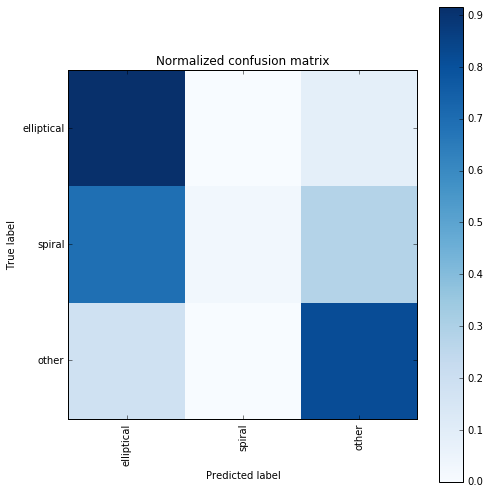

In [72]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ["elliptical", "other", "spiral"], rotation=90)
    plt.yticks(tick_marks, ["elliptical", "other", "spiral"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# compute and plot confusion matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()